<a href="https://colab.research.google.com/github/marianvela/tm-im-labs/blob/master/TM_IM_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Mining & Image Recognition
Laboratorio 1
Marian Vela - 17001222

In [1]:
# Library imports

import cv2
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

In [4]:
def active_channel(image, color):
    # split into RGB channels using opencv
    blue, green, red = cv2.split(image)

    # initialize to zero
    zero_channel = np.zeros_like(blue)

    if color == 1:
        return cv2.merge([blue, zero_channel, zero_channel])
    elif color == 2:
        return cv2.merge([zero_channel, green, zero_channel])
    elif color == 3:
        return cv2.merge([zero_channel, zero_channel, red])
    elif color == 10:
        return cv2.merge([zero_channel, green, red])
    elif color == 20:
        return cv2.merge([blue, green, zero_channel])
    elif color == 30:
        return cv2.merge([blue, zero_channel, red])
    # si no hay una combinacion valida, no se aplica ningun cambio a la imagen
    else:
        return image

In [7]:
cat = cv2.imread('/content/cat.jpg')
result = active_channel(cat, 10)
cv2.imwrite('/content/cat_bg.jpg', result)

result2 = active_channel(cat, 3)
cv2.imwrite('/content/cat_r.jpg', result2)

True

## Problema 2

In [8]:
# input: path a las imagenes
def reconstruct(path_grayscale_blue, path_grayscale_green, path_grayscale_red):
    grayscale_blue = cv2.imread(path_grayscale_blue, cv2.IMREAD_GRAYSCALE)
    grayscale_green = cv2.imread(path_grayscale_green, cv2.IMREAD_GRAYSCALE)
    grayscale_red = cv2.imread(path_grayscale_red, cv2.IMREAD_GRAYSCALE)

    return cv2.merge([grayscale_blue, grayscale_green, grayscale_red])

In [9]:
# BGR

perro = reconstruct(
    '/content/perro/perro_salida_gray_azul.jpg',
    '/content/perro/perro_salida_gray_verde.jpg',
    '/content/perro/perro_salida_gray_rojo.jpg'
)
cv2.imwrite('/content/perro/perro.jpg', perro)


image1 = reconstruct(
    '/content/imagen1/imagen1_salida_gray_azul.jpg',
    '/content/imagen1/imagen1_salida_gray_verde.jpg',
    '/content/imagen1/imagen1_salida_gray_rojo.jpg'
)
cv2.imwrite('/content/imagen1/imagen1.jpg', image1)

image2 = reconstruct(
    '/content/imagen2/imagen2_salida_gray_azul.jpg',
    '/content/imagen2/imagen2_salida_gray_verde.jpg',
    '/content/imagen2/imagen2_salida_gray_rojo.jpg'
)
cv2.imwrite('/content/imagen2/imagen2.jpg', image2)

True

## Problema 3

In [10]:
def get_3D_grayscale(image):
    blue, green, red = cv2.split(image)
    return blue, green, red

In [14]:
cat = cv2.imread('/content/cat.jpg')
cat_blue_gray, cat_green_gray, cat_red_gray = get_3D_grayscale(cat)
cv2.imwrite('/content/cat_gray/cat_blue_gray.jpg', cat_blue_gray)
cv2.imwrite('/content/cat_gray/cat_green_gray.jpg', cat_green_gray)
cv2.imwrite('/content/cat_gray/cat_red_gray.jpg', cat_red_gray)

True

## Problema 4

In [15]:
def calculate_histograms(image):
    # get color channels
    blue = image[:, :, 0]
    green = image[:, :, 1]
    red = image[:, :, 2]

    # calculate histograms for each channel and grayscale
    histogram_blue = np.histogram(blue, bins=256, range=(0, 256))[0]
    histogram_green = np.histogram(green, bins=256, range=(0, 256))[0]
    histogram_red = np.histogram(red, bins=256, range=(0, 256))[0]

    grayscale = np.mean(image, axis=2).astype(np.uint8)
    histogram_gray = np.histogram(grayscale, bins=256, range=(0, 256))[0]

    # calculate the mean for each channel
    mean_blue = np.mean(blue)
    mean_green = np.mean(green)
    mean_red = np.mean(red)
    mean_gray = np.mean(grayscale)

    # plot histograms
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(histogram_blue, color='blue')
    plt.axvline(mean_blue, color='blue', linestyle='dashed', linewidth=1)
    plt.title('Blue Channel')

    plt.subplot(4, 1, 2)
    plt.plot(histogram_green, color='green')
    plt.axvline(mean_green, color='green', linestyle='dashed', linewidth=1)
    plt.title('Green Channel')

    plt.subplot(4, 1, 3)
    plt.plot(histogram_red, color='red')
    plt.axvline(mean_red, color='red', linestyle='dashed', linewidth=1)
    plt.title('Red Channel')

    plt.subplot(4, 1, 4)
    plt.plot(histogram_gray, color='black')
    plt.axvline(mean_gray, color='black', linestyle='dashed', linewidth=1)
    plt.title('Grayscale')

    plt.tight_layout()
    plt.show()

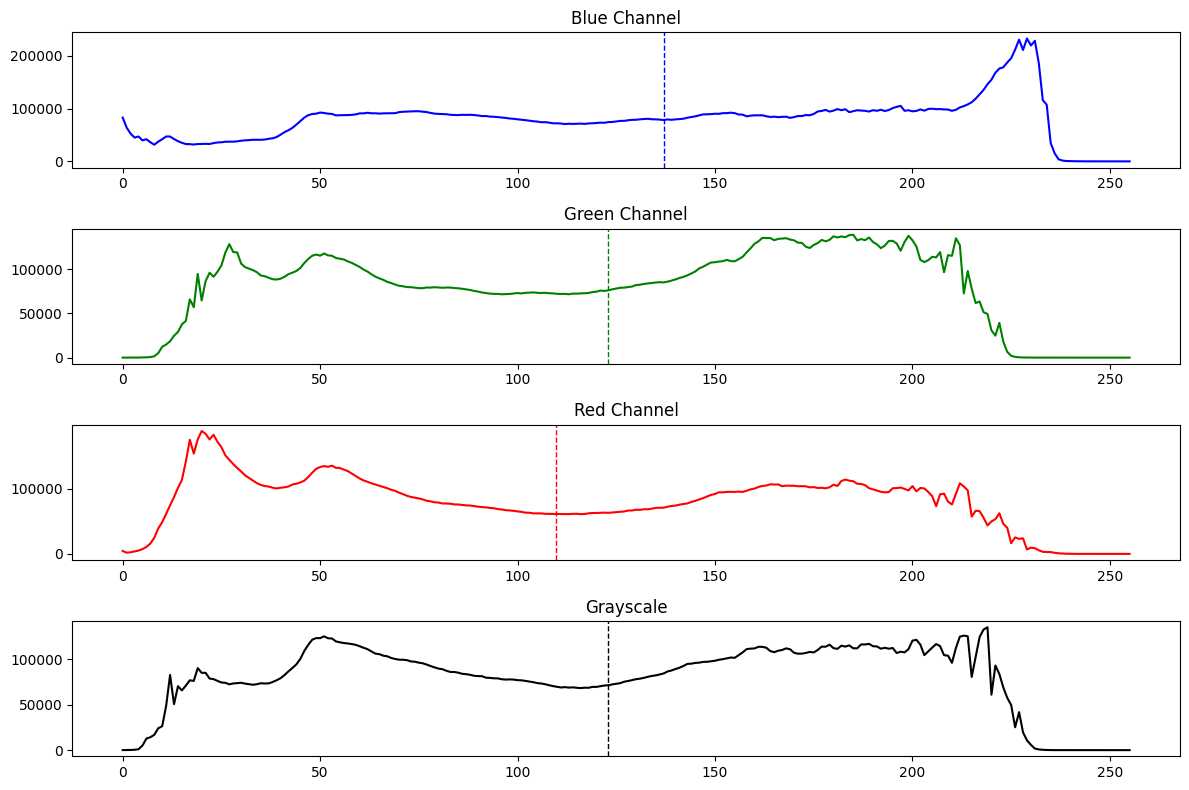

In [16]:
cat = plt.imread('/content/cat.jpg')
calculate_histograms(cat)

## Problema 5

El ojo percibe distintas intesidades de luz en función del color que se observe, por esa razón el cálculo de escala de grises debe realizarse como una media ponderada de las distintas componentes de color.

La ecuación de la luminancia es la expresión matemática de ese fenómeno y los ponderadores de cada componente de color nos indican la sensibilidad del ojo humano a las frecuencias del espectro rojo, verde y azul.

$ Y = R*0.3+G*0.59+B*0.11 $

https://www.uv.es/gpoei/eng/Pfc_web/generalidades/grises/grey.htm

In [21]:
def weighted_grayscale(image):
    gray = image[..., 0] * 0.11 + image[..., 1] * 0.59 + image[..., 2] * 0.3
    return gray.astype(np.uint8)

In [22]:
cat = plt.imread('/content/cat.jpg')
gray_weighted_cat = weighted_grayscale(cat)
cv2.imwrite('/content/weighted_grayscale_cat.jpg', gray_weighted_cat)

True

## Problema 6

### Espacio de Color HSV

El modelo de color HSV, cada color se modela por tres componentes tono (H), saturación (S) y luminosidad (V) y se asimila a la percepción humana del color. Cabe mencionar que este espacio se representa como un cono.

1. **Tono (H - Hue)**: Representa el tipo de color y se mide en grados, de 0 a 360. Cada valor de tono corresponde a un color específico en el espectro de colores, por ejemplo, 0° para el rojo, 120° para el verde y 240° para el azul. El tono define la "familia" de colores.

2. **Saturación (S - Saturation)**: Mide la intensidad o pureza del color y se expresa como un porcentaje. Una saturación del 0% indica un color completamente desaturado (blanco, gris o negro), mientras que una saturación del 100% representa un color completamente puro y vibrante.

3. **Luminosidad (V - Value)**: También conocido como brillo o valor, indica cuán claro u oscuro es el color. Se mide como un porcentaje donde 0% es negro absoluto y 100% es el color en su máxima brillantez.

El modelo HSV es particularmente útil en aplicaciones de diseño gráfico y análisis de imágenes porque permite seleccionar y ajustar colores de manera intuitiva. Al mapear los colores al espacio HSV, es fácil modificar el tono para cambiar el color, ajustar la saturación para cambiar la intensidad del color o variar la luminosidad, sin afectar los otros componentes. Esto proporciona una mayor flexibilidad y control sobre la manipulación de colores en comparación con otros espacios de color.

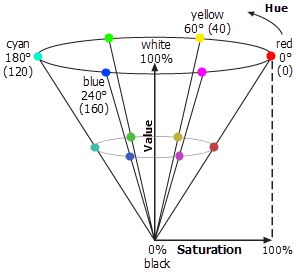

In [24]:
from IPython.display import Image
Image('/content/HSV.png')